<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Caller Number            17590 non-null  object
 1   Call Time                17590 non-null  object
 2   Call Duration(in s)      17590 non-null  int64 
 3   Call Frequency Per Day   17590 non-null  int64 
 4   Call Frequency Per Week  17590 non-null  int64 
 5   Call Type                17590 non-null  object
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Caller Number            17590 non-null  object
 1   Call Time                17590 non-null  object
 2   Call Duration(in s)      17590 non-nul

c:\Users\achal\Desktop\Mini Project-Spam Calls\b_preprocessing.ipynb:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  "import pandas as pd\n",


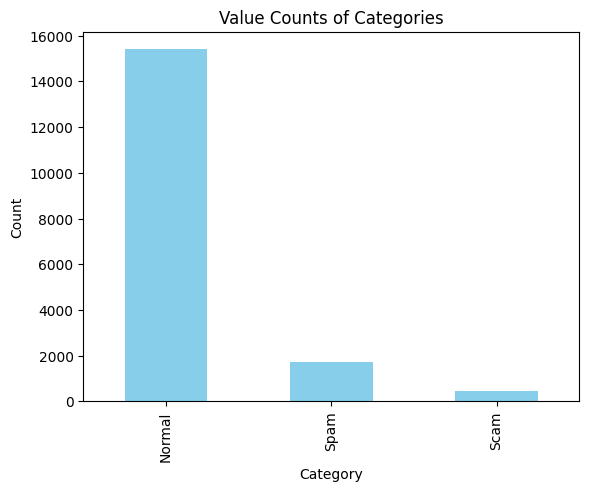

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


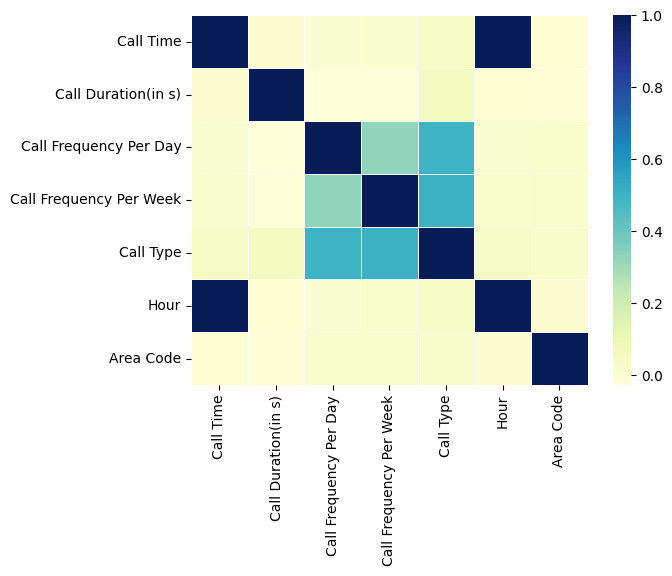

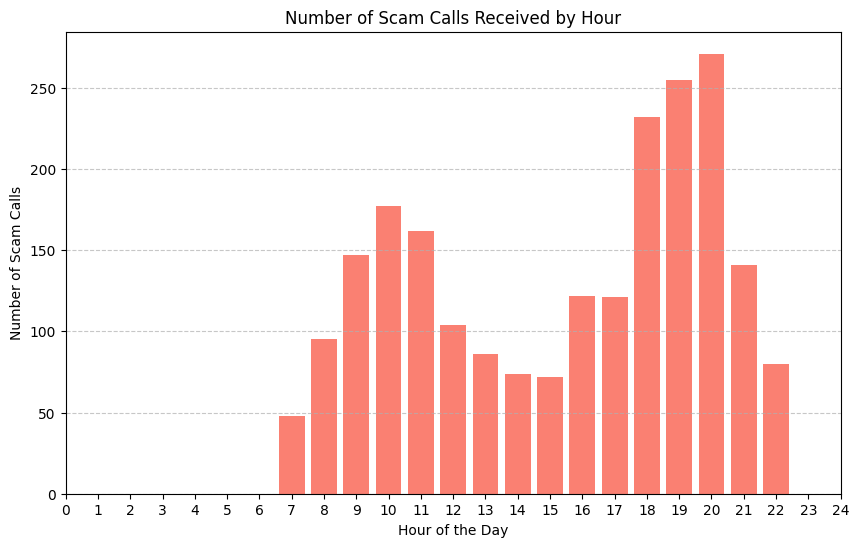

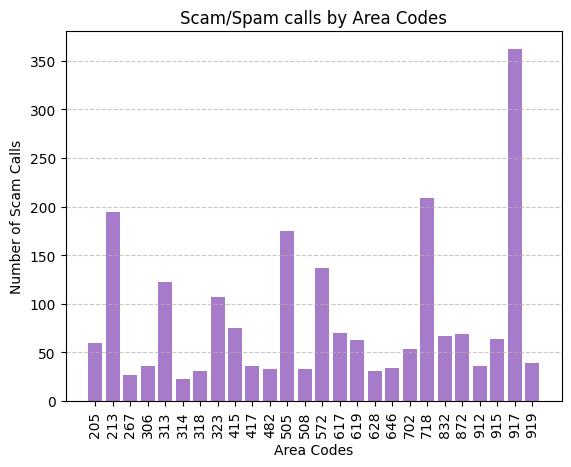

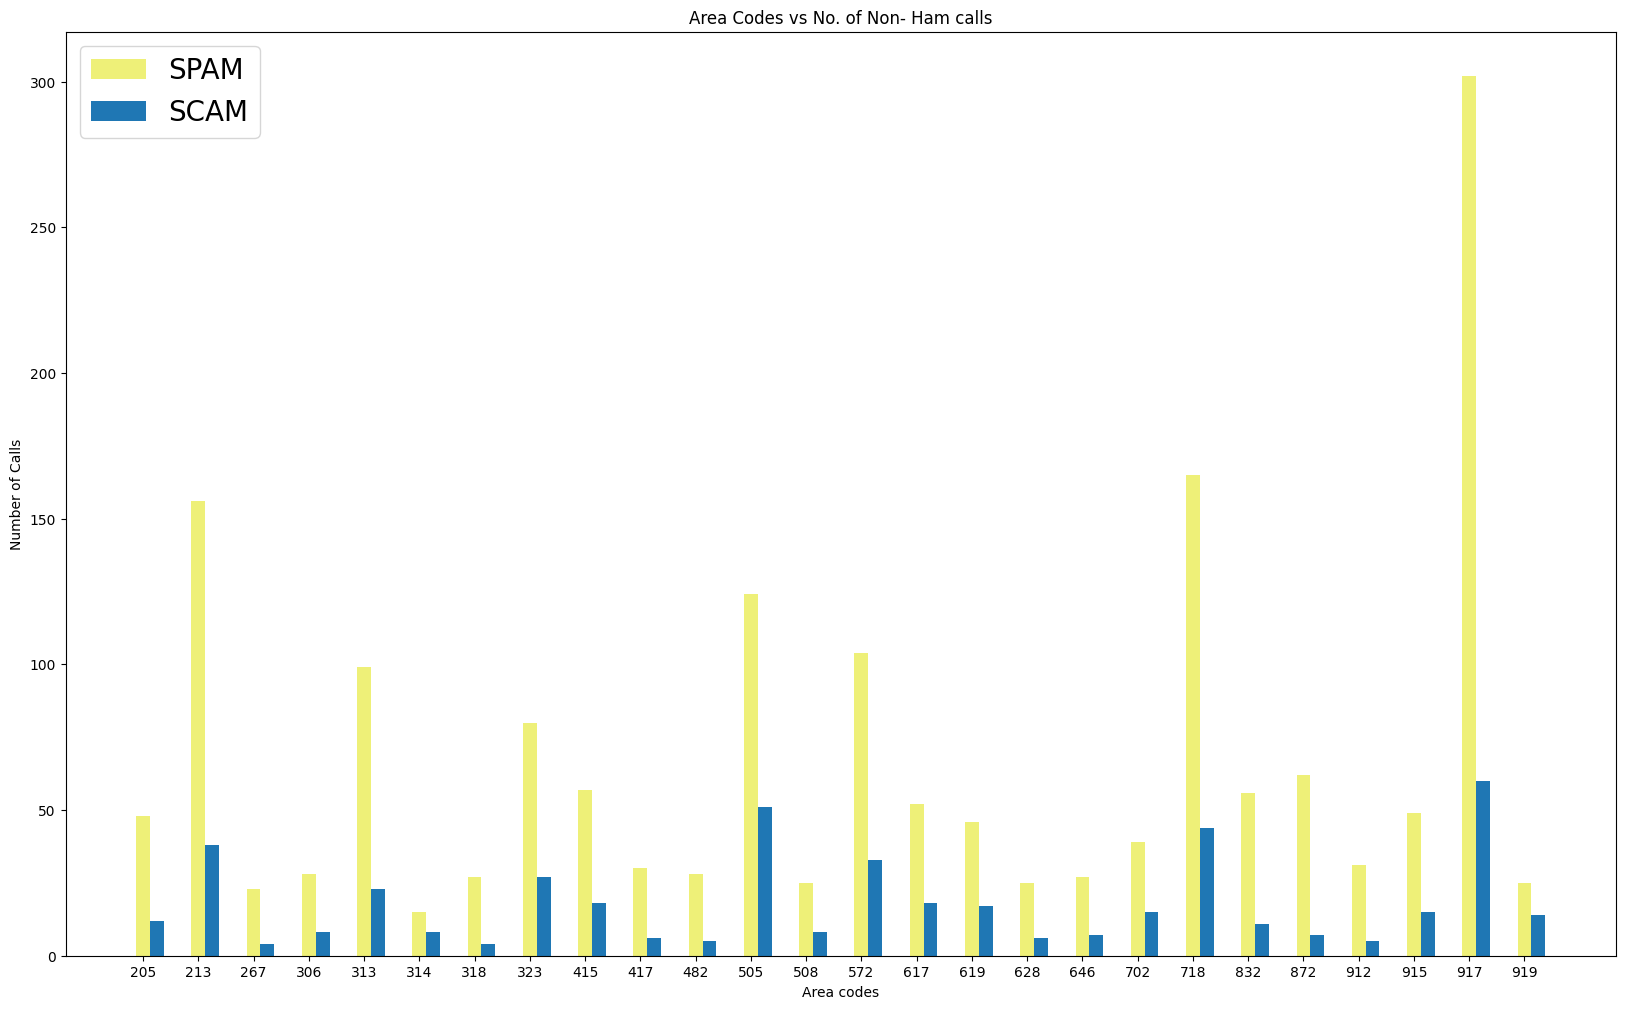

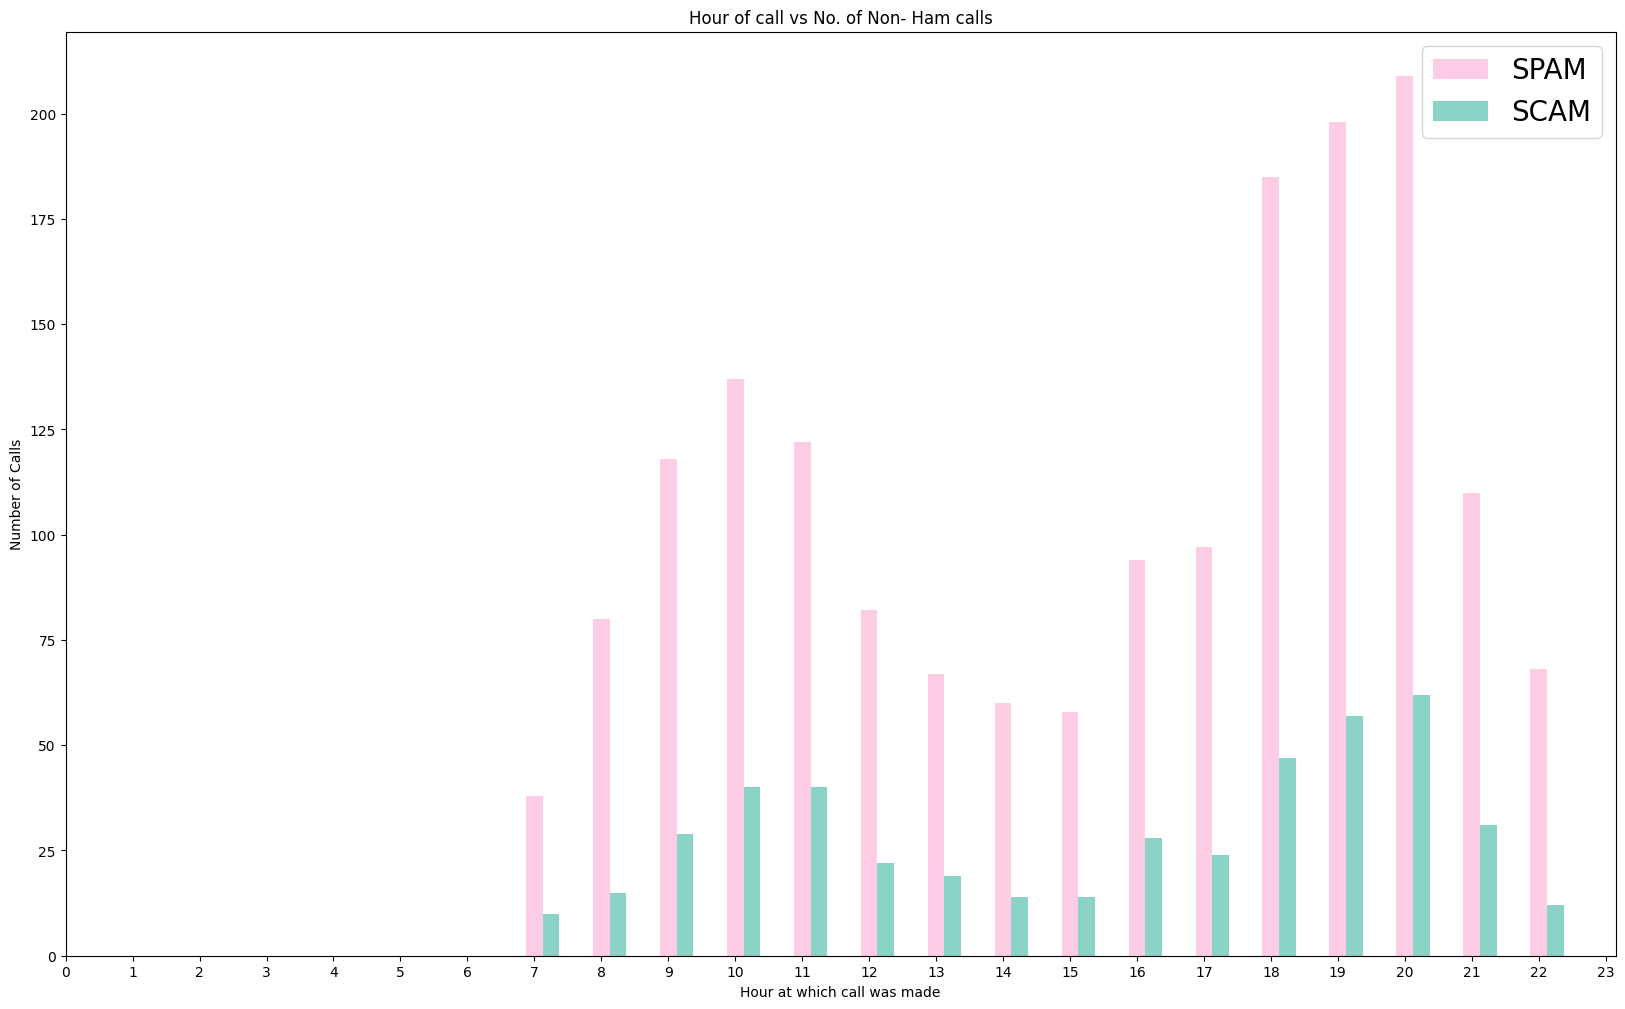

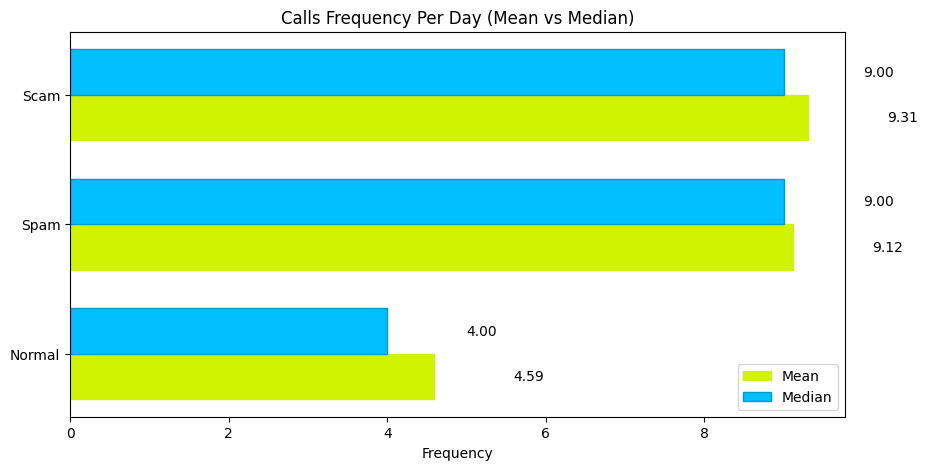

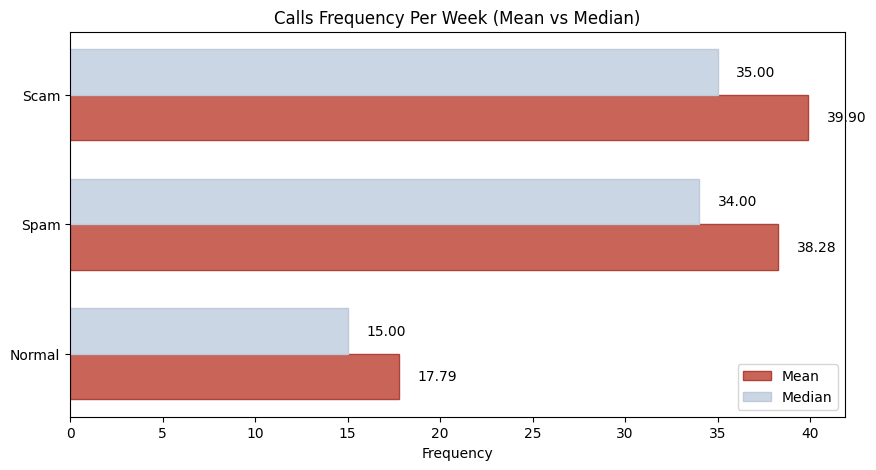

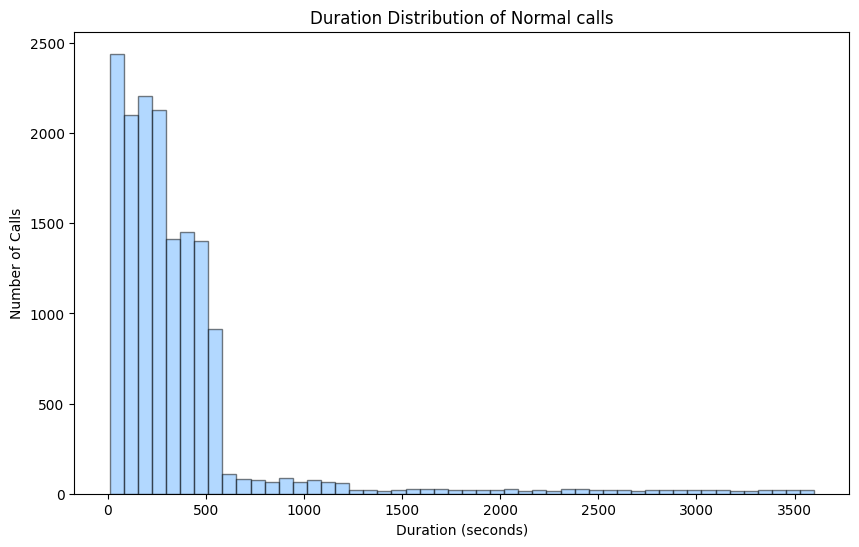

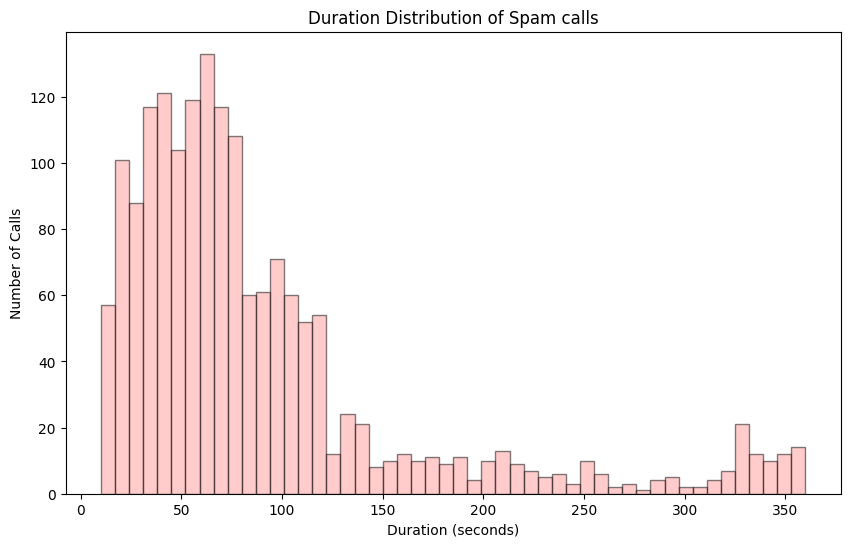

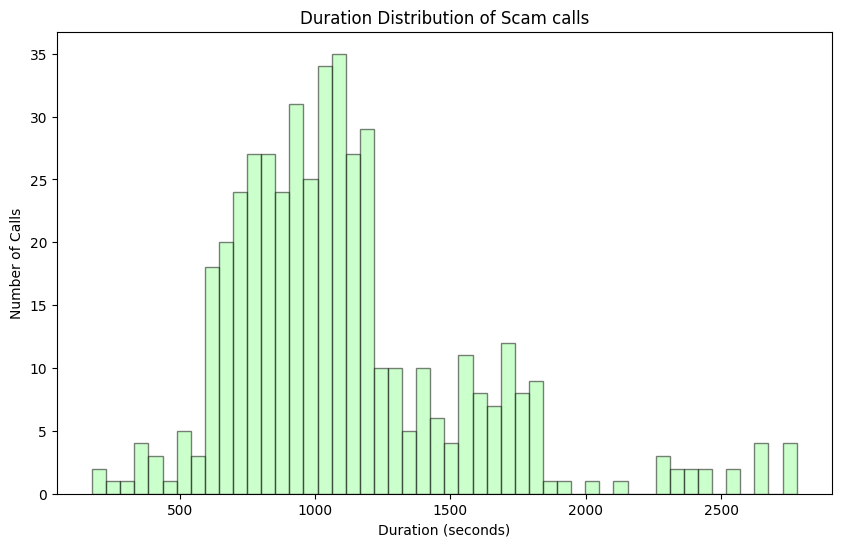

In [2]:
import numpy as np
import pandas as pd
from ipynb.fs.full.b_preprocessing import *
from ipynb.fs.full.b_preprocessing import c_fraud_df
# c_fraud_df = pd.read_csv("corrected_names.csv")
from sklearn.preprocessing import LabelEncoder


In [3]:
c_fraud_df.tail()

,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Call Type,Conversation,Hour,Area Code
17585,+1-917-791-9831,1900-01-01 18:51:30,38,7,27,1,Met your garden ready for summer with a FREE s...,18,917
17586,+1-718-872-8600,1900-01-01 19:41:54,332,4,12,0,Its ok my arm is feeling weak cut i got a shot...,19,718
17587,+1-617-711-8247,1900-01-01 16:21:54,21,2,30,0,Ouh means computational science... Y they like...,16,617
17588,+1-205-543-7635,1900-01-01 10:40:51,147,2,22,0,"Sorry, I'll call later",10,205
17589,+1-646-342-3801,1900-01-01 16:53:26,2370,5,6,0,You are a very very very very bad girl. Or lady.,16,646


In [4]:
c_fraud_df['Call Duration(in min)'] = c_fraud_df['Call Duration(in s)'].divide(60).astype(int)
c_fraud_df.head()

,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Call Type,Conversation,Hour,Area Code,Call Duration(in min)
0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,0,"Hope. Since ago travelled, he has forgotten hi...",8,917,1
1,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,0,Horrible you eat mass eat until u forgot about...,17,205,1
2,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,0,Great! I have to run now so tell!,16,702,0
3,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,0,"Sorry, I'll call later",17,915,0
4,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,0,"May wants to work out first, how's 4 sound?",20,915,4


In [5]:
correlation_matrix = c_fraud_df.drop(columns=columns_to_exclude).corr()  # type: ignore
correlation_matrix['Call Type']
#Here Seconds has better correlation than mins therefore drop the column

Call Time                  0.040908
Call Duration(in s)        0.058371
Call Frequency Per Day     0.494189
Call Frequency Per Week    0.506251
Call Type                  1.000000
Hour                       0.041777
Area Code                  0.028290
Call Duration(in min)      0.057569
Name: Call Type, dtype: float64

In [6]:
c_fraud_df.drop('Call Duration(in min)',axis=1,inplace=True)

In [7]:
c_fraud_df.head()

,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Call Type,Conversation,Hour,Area Code
0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,0,"Hope. Since ago travelled, he has forgotten hi...",8,917
1,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,0,Horrible you eat mass eat until u forgot about...,17,205
2,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,0,Great! I have to run now so tell!,16,702
3,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,0,"Sorry, I'll call later",17,915
4,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,0,"May wants to work out first, how's 4 sound?",20,915


In [8]:
c_fraud_df['Freq'] = abs((c_fraud_df['Call Frequency Per Day'].multiply(7)) - c_fraud_df['Call Frequency Per Week'])
c_fraud_df.head()

,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Call Type,Conversation,Hour,Area Code,Freq
0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,0,"Hope. Since ago travelled, he has forgotten hi...",8,917,4
1,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,0,Horrible you eat mass eat until u forgot about...,17,205,10
2,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,0,Great! I have to run now so tell!,16,702,21
3,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,0,"Sorry, I'll call later",17,915,49
4,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,0,"May wants to work out first, how's 4 sound?",20,915,5


In [9]:
correlation_matrix = c_fraud_df.drop(columns=columns_to_exclude).corr()  # type: ignore
correlation_matrix['Call Type']

Call Time                  0.040908
Call Duration(in s)        0.058371
Call Frequency Per Day     0.494189
Call Frequency Per Week    0.506251
Call Type                  1.000000
Hour                       0.041777
Area Code                  0.028290
Freq                       0.232712
Name: Call Type, dtype: float64

In [10]:
#Dropping freq column as parent columns hav better frequencies
c_fraud_df.drop('Freq',axis=1,inplace=True)

In [11]:
c_fraud_df.head()

,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Call Type,Conversation,Hour,Area Code
0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,0,"Hope. Since ago travelled, he has forgotten hi...",8,917
1,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,0,Horrible you eat mass eat until u forgot about...,17,205
2,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,0,Great! I have to run now so tell!,16,702
3,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,0,"Sorry, I'll call later",17,915
4,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,0,"May wants to work out first, how's 4 sound?",20,915


In [12]:
bins = [0, 7, 9, 12, 15, 17, 20, 23]
labels = ['0-7', '7-9', '9-12', '12-15','15-17','17-20','20-23']
c_fraud_df['TimeOfDay'] = pd.cut(c_fraud_df['Hour'], bins=bins, labels=labels, right=False)
c_fraud_df.head()

,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Call Type,Conversation,Hour,Area Code,TimeOfDay
0,+1-917-555-3286,1900-01-01 08:50:33,62,3,25,0,"Hope. Since ago travelled, he has forgotten hi...",8,917,7-9
1,+1-205-795-8028,1900-01-01 17:05:53,78,3,31,0,Horrible you eat mass eat until u forgot about...,17,205,17-20
2,+1-702-412-9422,1900-01-01 16:29:51,55,4,7,0,Great! I have to run now so tell!,16,702,15-17
3,+1-915-426-2998,1900-01-01 17:36:33,48,9,14,0,"Sorry, I'll call later",17,915,17-20
4,+1-915-543-9437,1900-01-01 20:19:36,262,3,16,0,"May wants to work out first, how's 4 sound?",20,915,20-23


In [13]:
c_fraud_df = pd.get_dummies(c_fraud_df, columns=['TimeOfDay'], drop_first=True)
correlation_new = c_fraud_df.drop(columns=columns_to_exclude).corr()
correlation_new['Call Type']

#These columns can be retained as they provide good correlation

Call Time                  0.040908
Call Duration(in s)        0.058371
Call Frequency Per Day     0.494189
Call Frequency Per Week    0.506251
Call Type                  1.000000
Hour                       0.041777
Area Code                  0.028290
TimeOfDay_7-9             -0.023117
TimeOfDay_9-12             0.034060
TimeOfDay_12-15           -0.031746
TimeOfDay_15-17           -0.072766
TimeOfDay_17-20            0.036484
TimeOfDay_20-23            0.057326
Name: Call Type, dtype: float64